In [1]:
import numpy as np
#import matplotlib
#matplotlib.use('Agg');
import matplotlib.pyplot as plt
#plt.set_cmap('jet');
import random, os, sys, pandas, os, pickle
import argparse
from textwrap import wrap
%matplotlib inline
import glob

In [2]:
##############################################
##############################################
##############################################
##############################################
## below is code to plot the results of running this with "run.sh classify.ipynb"
## e.g "run.sh classify.ipynb -thing -nsamples 32 -seed 4"
## it writes a pickle file with the results for each run.


In [8]:
grad_mask_list = ['difffromref', 'contrast']
file_sets = {}
for gm in grad_mask_list:
    file_list = [ f for f in os.listdir("../logs/") if "penalisegrad"+gm in f]
    print("number of files for ", gm, ": ", len(file_list))
    file_sets[gm] = {"conditionalregTrue": {}, "conditionalregFalse": {}}
    keep_files = {}
    for c in ["conditionalregTrue", "conditionalregFalse"]:
        print(c)
        for i in range(6):
            seed = "seed"+str(i)
            matches = [f for f in file_list if seed in f and c in f]
            print(len(matches), " for seed and reg: ", i, c)
            if len(matches) != 0:
                keep_files[i] = matches
        file_sets[gm][c] = keep_files
        print(file_sets[gm][c][0][0])

print(file_sets[gm]["conditionalregTrue"][0][0])       
# for gm in grad_mask_list:
#     for c in ["conditionalregTrue", "conditionalregFalse"]:
#         for i in range(2):
#             print("Num files: ", gm, "_",c,"_",i,": ", len(file_sets[gm][c][i]))
#             print(file_sets[gm][c][i])

number of files for  difffromref :  110
conditionalregTrue
10  for seed and reg:  0 conditionalregTrue
10  for seed and reg:  1 conditionalregTrue
10  for seed and reg:  2 conditionalregTrue
10  for seed and reg:  3 conditionalregTrue
10  for seed and reg:  4 conditionalregTrue
10  for seed and reg:  5 conditionalregTrue
lambda20.99penalisegraddifffromrefoptimizerAdammaxmaskstrain256batchsize32datasetLungMSDDatasetseed0modelSimpleCNNoptimizerlr0.0087nsamplestrain64modelflatlayer7usemaskNoneusemasksTruelambda16.53maxmasks64conditionalregTrue
conditionalregFalse
10  for seed and reg:  0 conditionalregFalse
10  for seed and reg:  1 conditionalregFalse
0  for seed and reg:  2 conditionalregFalse
10  for seed and reg:  3 conditionalregFalse
10  for seed and reg:  4 conditionalregFalse
10  for seed and reg:  5 conditionalregFalse
datasetLungMSDDatasetbatchsize32usemaskNonelambda28.58modelflatlayer5seed0nsamplestrain64optimizerAdammaxmaskstrain256lambda15.93usemasksTruemaxmasks64conditionalre

In [181]:
print(len(file_sets['difffromref']["conditionalregFalse"][2]))

10


In [188]:
best_files_per_auc = {'difffromref': {"conditionalregTrue": {}, "conditionalregFalse": {}}, 
                      'contrast': {"conditionalregTrue": {}, "conditionalregFalse": {}}}
csv_rows = []
with open('../logs/experiment_table.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        csv_rows.append(row[0])

for gm in grad_mask_list:
    for c in ["conditionalregTrue", "conditionalregFalse"]:
        
        for i in [0, 1]: # range(6):
            print("reset best auc")
            best_for_gm_style = 0.0 # reset for each gm type and seed number
            for f in file_sets[gm][c][i]:
                file_time = time.ctime(os.path.getctime("../logs/"+f))
                line_match = [[f, r.split("\t")[2]] for r in csv_rows if r.split("\t")[0] == file_time]
                if len(line_match) > 0 and float(line_match[0][1]) > best_for_gm_style:
                    best_for_gm_style = float(line_match[0][1]) # update the best AUC
                    best_files_per_auc[gm][c][i] = line_match
            print("Best AUC for ", gm, "style, ", c, " and seed: ", i, " is ", best_for_gm_style)

best_files_list = []
for k, i in best_files_per_auc.items():
    for seed in i.keys():
        best_files_list.append(best_files_per_auc[k][seed][0][0])

print(len(best_files_list))

reset best auc
Best AUC for  difffromref style,  conditionalregTrue  and seed:  0  is  0.69921875
reset best auc
Best AUC for  difffromref style,  conditionalregTrue  and seed:  1  is  0.75
reset best auc
Best AUC for  difffromref style,  conditionalregFalse  and seed:  0  is  0.69921875
reset best auc
Best AUC for  difffromref style,  conditionalregFalse  and seed:  1  is  0.75
reset best auc
Best AUC for  contrast style,  conditionalregTrue  and seed:  0  is  0.74609375
reset best auc
Best AUC for  contrast style,  conditionalregTrue  and seed:  1  is  0.73828125
reset best auc
Best AUC for  contrast style,  conditionalregFalse  and seed:  0  is  0.74609375
reset best auc
Best AUC for  contrast style,  conditionalregFalse  and seed:  1  is  0.73828125
4


In [ ]:
### Get the gradmask = False baseline
import csv
import time

file_list = [f for f in os.listdir("../old_logs_Mar22/") if "penalise_grad:False" in f] 
keep_files = {}
print("number of files for False: ", len(file_list))
for i in range(6):
    seed = "seed:"+str(i)+","
    matches = [f for f in file_list if seed in f]
    print(len(matches), " for seed:", i)
    if len(matches) != 0:
        keep_files[i] = matches
    file_sets["False"] = keep_files
    
with open('../old_logs_Mar22/experiment_table.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        csv_rows.append(row[0])

In [9]:

ddf = pandas.DataFrame()
#for fn in best_files_list:
for f in glob.glob("../logs/*/*/*.pkl"):
    d = (pickle.load(open(f,"rb")))
    ddf = ddf.append(pandas.DataFrame(d))

/network/home/simpsonb/miniconda3/envs/gradmask/lib/python3.5/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
df = ddf.copy()

In [11]:
df.shape

(21000, 39)

In [12]:
df.columns

Index(['batch_size', 'best_testauc_for_validauc', 'conditional_reg', 'cuda',
       'epoch', 'manager', 'manager_name', 'manager_uri', 'maxmasks_train',
       'model', 'model_flat_layer', 'n_iter', 'nsamples_train', 'num_epochs',
       'optimizer', 'optimizer_lr', 'penalise_grad', 'penalise_grad_lambda_1',
       'penalise_grad_lambda_2', 'penalise_grad_usemask',
       'penalise_grad_usemasks', 'seed', 'shuffle', 'skopt', 'test_dataset',
       'test_dataset_mode', 'test_dataset_nsamples', 'testauc',
       'train_dataset', 'train_dataset_blur', 'train_dataset_maxmasks',
       'train_dataset_mode', 'train_dataset_nsamples', 'trainloss',
       'transform', 'valid_dataset', 'valid_dataset_mode',
       'valid_dataset_nsamples', 'validauc'],
      dtype='object')

In [13]:
# del df["optimizer"]
# del df["train_dataset_blur"]
del df["model_flat_layer"]
del df["transform"]
del df["cuda"]

In [14]:
for i in df.columns:
    if "valid_dataset" in i:
        print (i)
        del df[i]
    if "test_dataset" in i:
        print (i)
        del df[i]
    if "train_dataset_" in i:
        print(i)
        del df[i]

test_dataset
test_dataset_mode
test_dataset_nsamples
train_dataset_blur
train_dataset_maxmasks
train_dataset_mode
train_dataset_nsamples
valid_dataset
valid_dataset_mode
valid_dataset_nsamples


In [15]:
df.head(10)

,batch_size,best_testauc_for_validauc,conditional_reg,epoch,manager,manager_name,manager_uri,maxmasks_train,model,n_iter,...,penalise_grad_lambda_2,penalise_grad_usemask,penalise_grad_usemasks,seed,shuffle,skopt,testauc,train_dataset,trainloss,validauc
0,32,0.503906,True,0,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.503906,LungMSDDataset,14.578729,0.503906
1,32,0.503906,True,1,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.500000,LungMSDDataset,27.176453,0.500000
2,32,0.636719,True,2,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.636719,LungMSDDataset,4.528724,0.574219
3,32,0.636719,True,3,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.605469,LungMSDDataset,0.797985,0.519531
4,32,0.636719,True,4,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.558594,LungMSDDataset,0.999817,0.476562
5,32,0.636719,True,5,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.515625,LungMSDDataset,0.951838,0.511719
6,32,0.636719,True,6,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.554688,LungMSDDataset,0.878351,0.523438
7,32,0.636719,True,7,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.558594,LungMSDDataset,0.722009,0.535156
8,32,0.664062,True,8,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.664062,LungMSDDataset,0.684981,0.621094
9,32,0.664062,True,9,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.601562,LungMSDDataset,0.691532,0.542969


In [16]:
print (df.train_dataset.unique())
print (df.penalise_grad.unique())
print (df.train_dataset_nsamples.unique())
print (df.train_dataset_maxmasks.unique())
print (df.optimizer_lr.unique())

['LungMSDDataset']
['contrast' 'diff_from_ref']


AttributeError: 'DataFrame' object has no attribute 'train_dataset_nsamples'

In [17]:
df = df[(df.nsamples == 64) & (df.optimizer_lr==0.0001)]

AttributeError: 'DataFrame' object has no attribute 'nsamples'

In [19]:
df.head(10)

,batch_size,best_testauc_for_validauc,conditional_reg,epoch,manager,manager_name,manager_uri,maxmasks_train,model,n_iter,...,penalise_grad_lambda_2,penalise_grad_usemask,penalise_grad_usemasks,seed,shuffle,skopt,testauc,train_dataset,trainloss,validauc
0,32,0.503906,True,0,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.503906,LungMSDDataset,14.578729,0.503906
1,32,0.503906,True,1,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.500000,LungMSDDataset,27.176453,0.500000
2,32,0.636719,True,2,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.636719,LungMSDDataset,4.528724,0.574219
3,32,0.636719,True,3,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.605469,LungMSDDataset,0.797985,0.519531
4,32,0.636719,True,4,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.558594,LungMSDDataset,0.999817,0.476562
5,32,0.636719,True,5,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.515625,LungMSDDataset,0.951838,0.511719
6,32,0.636719,True,6,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.554688,LungMSDDataset,0.878351,0.523438
7,32,0.636719,True,7,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.558594,LungMSDDataset,0.722009,0.535156
8,32,0.664062,True,8,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.664062,LungMSDDataset,0.684981,0.621094
9,32,0.664062,True,9,set_experiment,exploration_2,NaN,256,SimpleCNN,30,...,4.572,None,True,1,True,True,0.601562,LungMSDDataset,0.691532,0.542969


In [20]:
#df[(df.nsamples == 64)]


In [29]:
df[(df.epoch==99)].groupby(["penalise_grad","conditional_reg","epoch", "seed"]).max().groupby(["penalise_grad","conditional_reg","epoch"]).mean()

batch_size  best_testauc_for_validauc  \
penalise_grad conditional_reg epoch                                          
contrast      False           99             32                   0.712240   
              True            99             32                   0.684896   
diff_from_ref False           99             32                   0.706250   
              True            99             32                   0.673177   

                                     maxmasks_train  n_iter  nsamples_train  \
penalise_grad conditional_reg epoch                                           
contrast      False           99                256      30              64   
              True            99                256      30              64   
diff_from_ref False           99                256      30              64   
              True            99                256      30              64   

                                     num_epochs  optimizer_lr  \
penalise_grad conditional_reg epoch                             
contrast      False           99            100      0.006550   
              True            99            100      0.006717   
diff_from_ref False           99            100      0.007020   
              True            99            100      0.007700   

                                     penalise_grad_lambda_1  \
penalise_grad conditional_reg epoch                           
contrast      False           99                   9.336667   
              True            99                   8.900767   
diff_from_ref False           99                   8.699920   
              True            99                   8.897300   

                                     penalise_grad_lambda_2  \
penalise_grad conditional_reg epoch                           
contrast      False           99                   8.859767   
              True            99                   8.836350   
diff_from_ref False           99                   8.997680   
              True            99                   9.076383   

                                     penalise_grad_usemask  \
penalise_grad conditional_reg epoch                          
contrast      False           99                       NaN   
              True            99                       NaN   
diff_from_ref False           99                       NaN   
              True            99                       NaN   

                                     penalise_grad_usemasks  shuffle  skopt  \
penalise_grad conditional_reg epoch                                           
contrast      False           99                       True     True   True   
              True            99                       True     True   True   
diff_from_ref False           99                       True     True   True   
              True            99                       True     True   True   

                                      testauc     trainloss  validauc  
penalise_grad conditional_reg epoch                                    
contrast      False           99     0.680990  6.306183e-01  0.700521  
              True            99     0.660807  6.934311e-01  0.695312  
diff_from_ref False           99     0.676562  1.622850e+10  0.706250  
              True            99     0.660807  1.477623e+11  0.697266

In [109]:
df[(df.epoch==99)].groupby(["penalise_grad"])[["best_testauc_for_validauc"]].count()

,best_testauc_for_validauc
penalise_grad,
False,6
contrast,6
diff_from_ref,6


In [111]:
qq = df[(df.epoch==99)].groupby(["penalise_grad", "conditional_reg"])[["best_testauc_for_validauc"]]
q = qq.mean().join(qq.std(),rsuffix='_std')
q = q.join(qq.count(),rsuffix='_count')
q

best_testauc_for_validauc  \
penalise_grad conditional_reg                              
False         0                                 0.705078   
contrast      0                                 0.763021   
              1                                 0.712240   
diff_from_ref 0                                 0.674219   
              1                                 0.722656   

                               best_testauc_for_validauc_std  \
penalise_grad conditional_reg                                  
False         0                                     0.022474   
contrast      0                                     0.033678   
              1                                     0.035229   
diff_from_ref 0                                     0.055697   
              1                                          NaN   

                               best_testauc_for_validauc_count  
penalise_grad conditional_reg                                   
False         0                                              6  
contrast      0                                              3  
              1                                              3  
diff_from_ref 0                                              5  
              1                                              1

IndexError: Column(s) ['best_testauc_for_validauc'] already selected

In [872]:
#subsetdata[subsetdata.penalise_grad == "diff_from_ref"].groupby("seed").count()

contrast num trials 100
diff_from_ref num trials 110


AttributeError: 'DataFrame' object has no attribute 'test_dataset_nsamples'

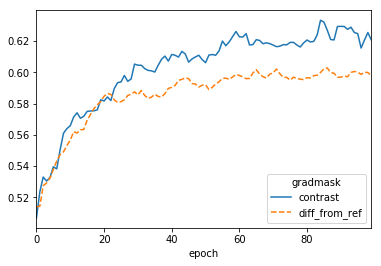

In [30]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df.reindex()
for k,i in enumerate(sorted(subsetdata.penalise_grad.unique())):

    thisdata = subsetdata[subsetdata.penalise_grad == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="gradmask")
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.test_dataset_nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


0 num trials 1
1 num trials 2


AttributeError: 'DataFrame' object has no attribute 'nsamples'

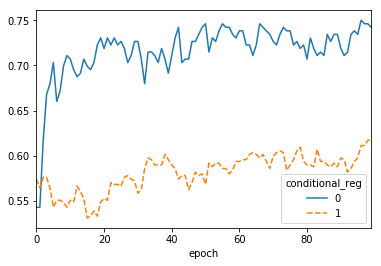

In [69]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[df.penalise_grad=="diff_from_ref"].reindex()
for k,i in enumerate(sorted(subsetdata.conditional_reg.unique())):

    thisdata = subsetdata[subsetdata.conditional_reg == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="testauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="conditional_reg")
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


In [623]:
#"num trials", subsetdata[subsetdata.thing == False].groupby(["epoch"]).count()

AttributeError: 'DataFrame' object has no attribute 'maskblur'

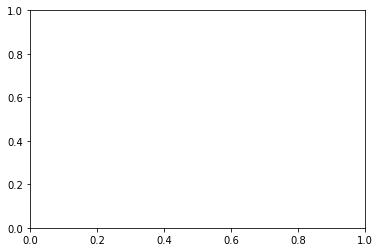

In [402]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.maskblur == 3) & 
              (df.batchsize == 16) & 
              (df.annealinglambda == 1.0) & 
              (df.thingstyle == 1.0) & 
              (df.epoch < 800) &
              (df.dataset == "tnt")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
plt.ylim(.55, 0.81);
#plt.xlim(0,500);

params = subsetdata.drop(["trainloss", "validauc", "seed", "epoch"], axis=1).iloc[0].to_dict()
params = "\n".join(wrap(str(params), 60))
plt.title(str(params) + ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

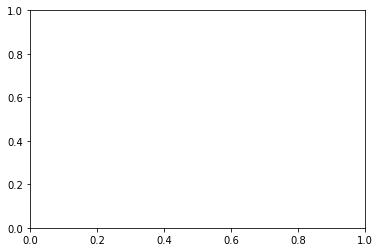

In [403]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.thing == True) & 
              (df.maskblur == 2) & 
              (df.annealinglambda == 1.0) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
#plt.ylim(.65, 0.81);
plt.xlim(0,500);

plt.title("Vary maxmasks used, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

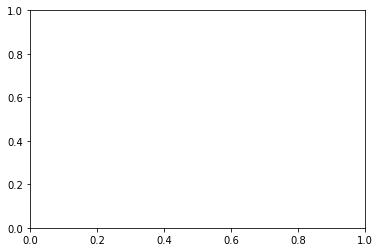

In [404]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 64) & 
              (df.thing == True) & 
              (df.maskblur == 3) & 
              (df.maxmasks == 64) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.annealinglambda.unique())):

    thisdata = subsetdata[subsetdata.annealinglambda == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="annealinglambda")
#plt.ylim(.65, 0.85);
#plt.xlim(0,600);

plt.title("Vary annealinglambda, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));
